# Logistic Regression

## Importing the Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset

In [2]:
dataset = sns.load_dataset("titanic")
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Understanding Data

In [3]:
col_to_drop=["embark_town","alive","class","adult_male","deck"]
dataset = dataset.drop(col_to_drop,axis=1)

In [4]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,alone
0,0,3,male,22.0,1,0,7.2500,S,man,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False
2,1,3,female,26.0,0,0,7.9250,S,woman,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False
4,0,3,male,35.0,0,0,8.0500,S,man,True


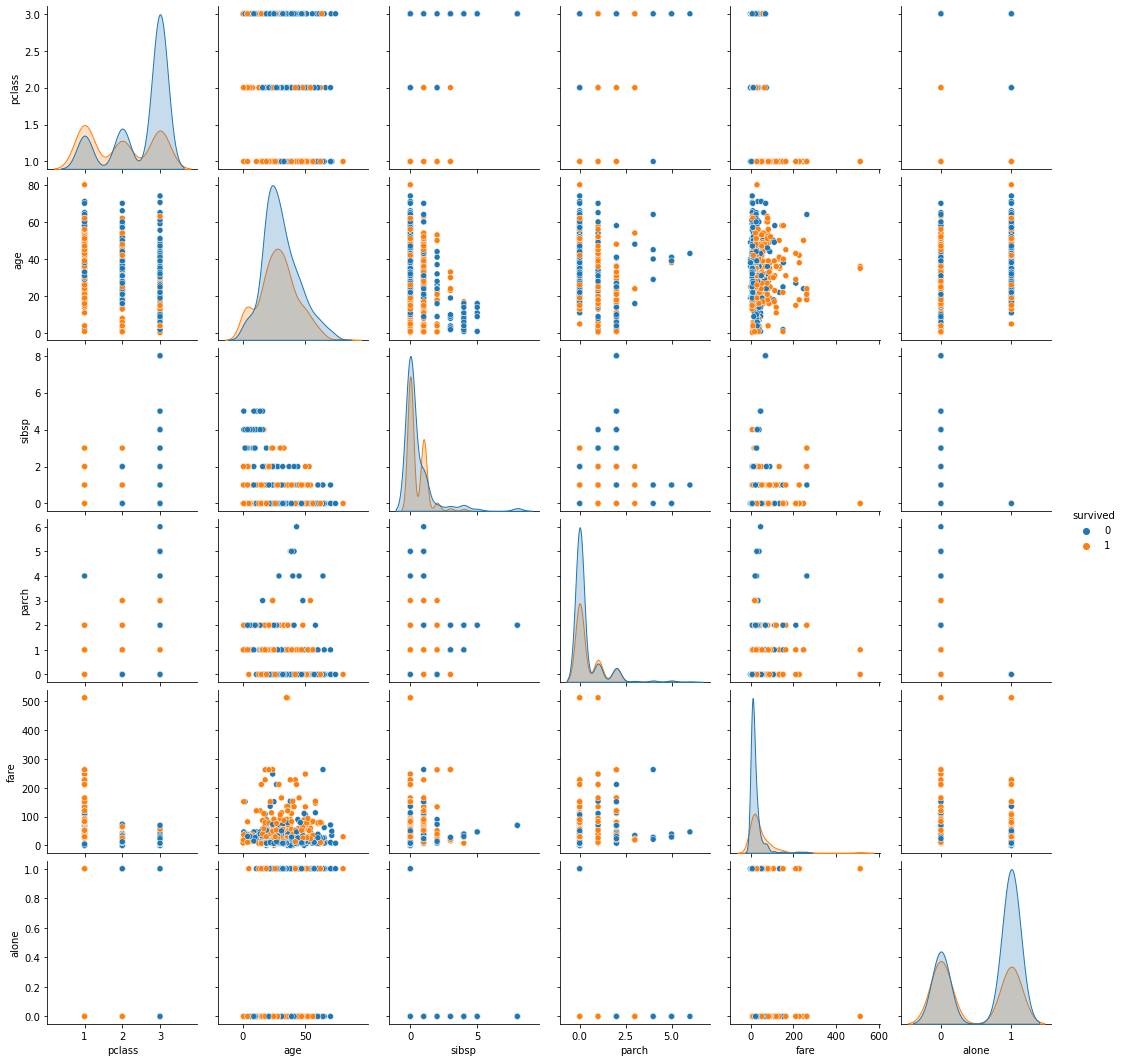

In [5]:
sns.pairplot(dataset,hue="survived")

## Taking care of Missing Data

In [6]:
dataset.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
who           0
alone         0
dtype: int64

In [7]:
col_to_fill=["age"]
dataset = dataset.fillna(dataset[col_to_fill].mean())

In [8]:
dataset = dataset.fillna(dataset['embarked'].ffill)

In [9]:
dataset.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
who         0
alone       0
dtype: int64

## Encoding Categorical Data

In [21]:
dataset = pd.get_dummies(dataset)

## Visualising the Data

C:\Users\91852\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


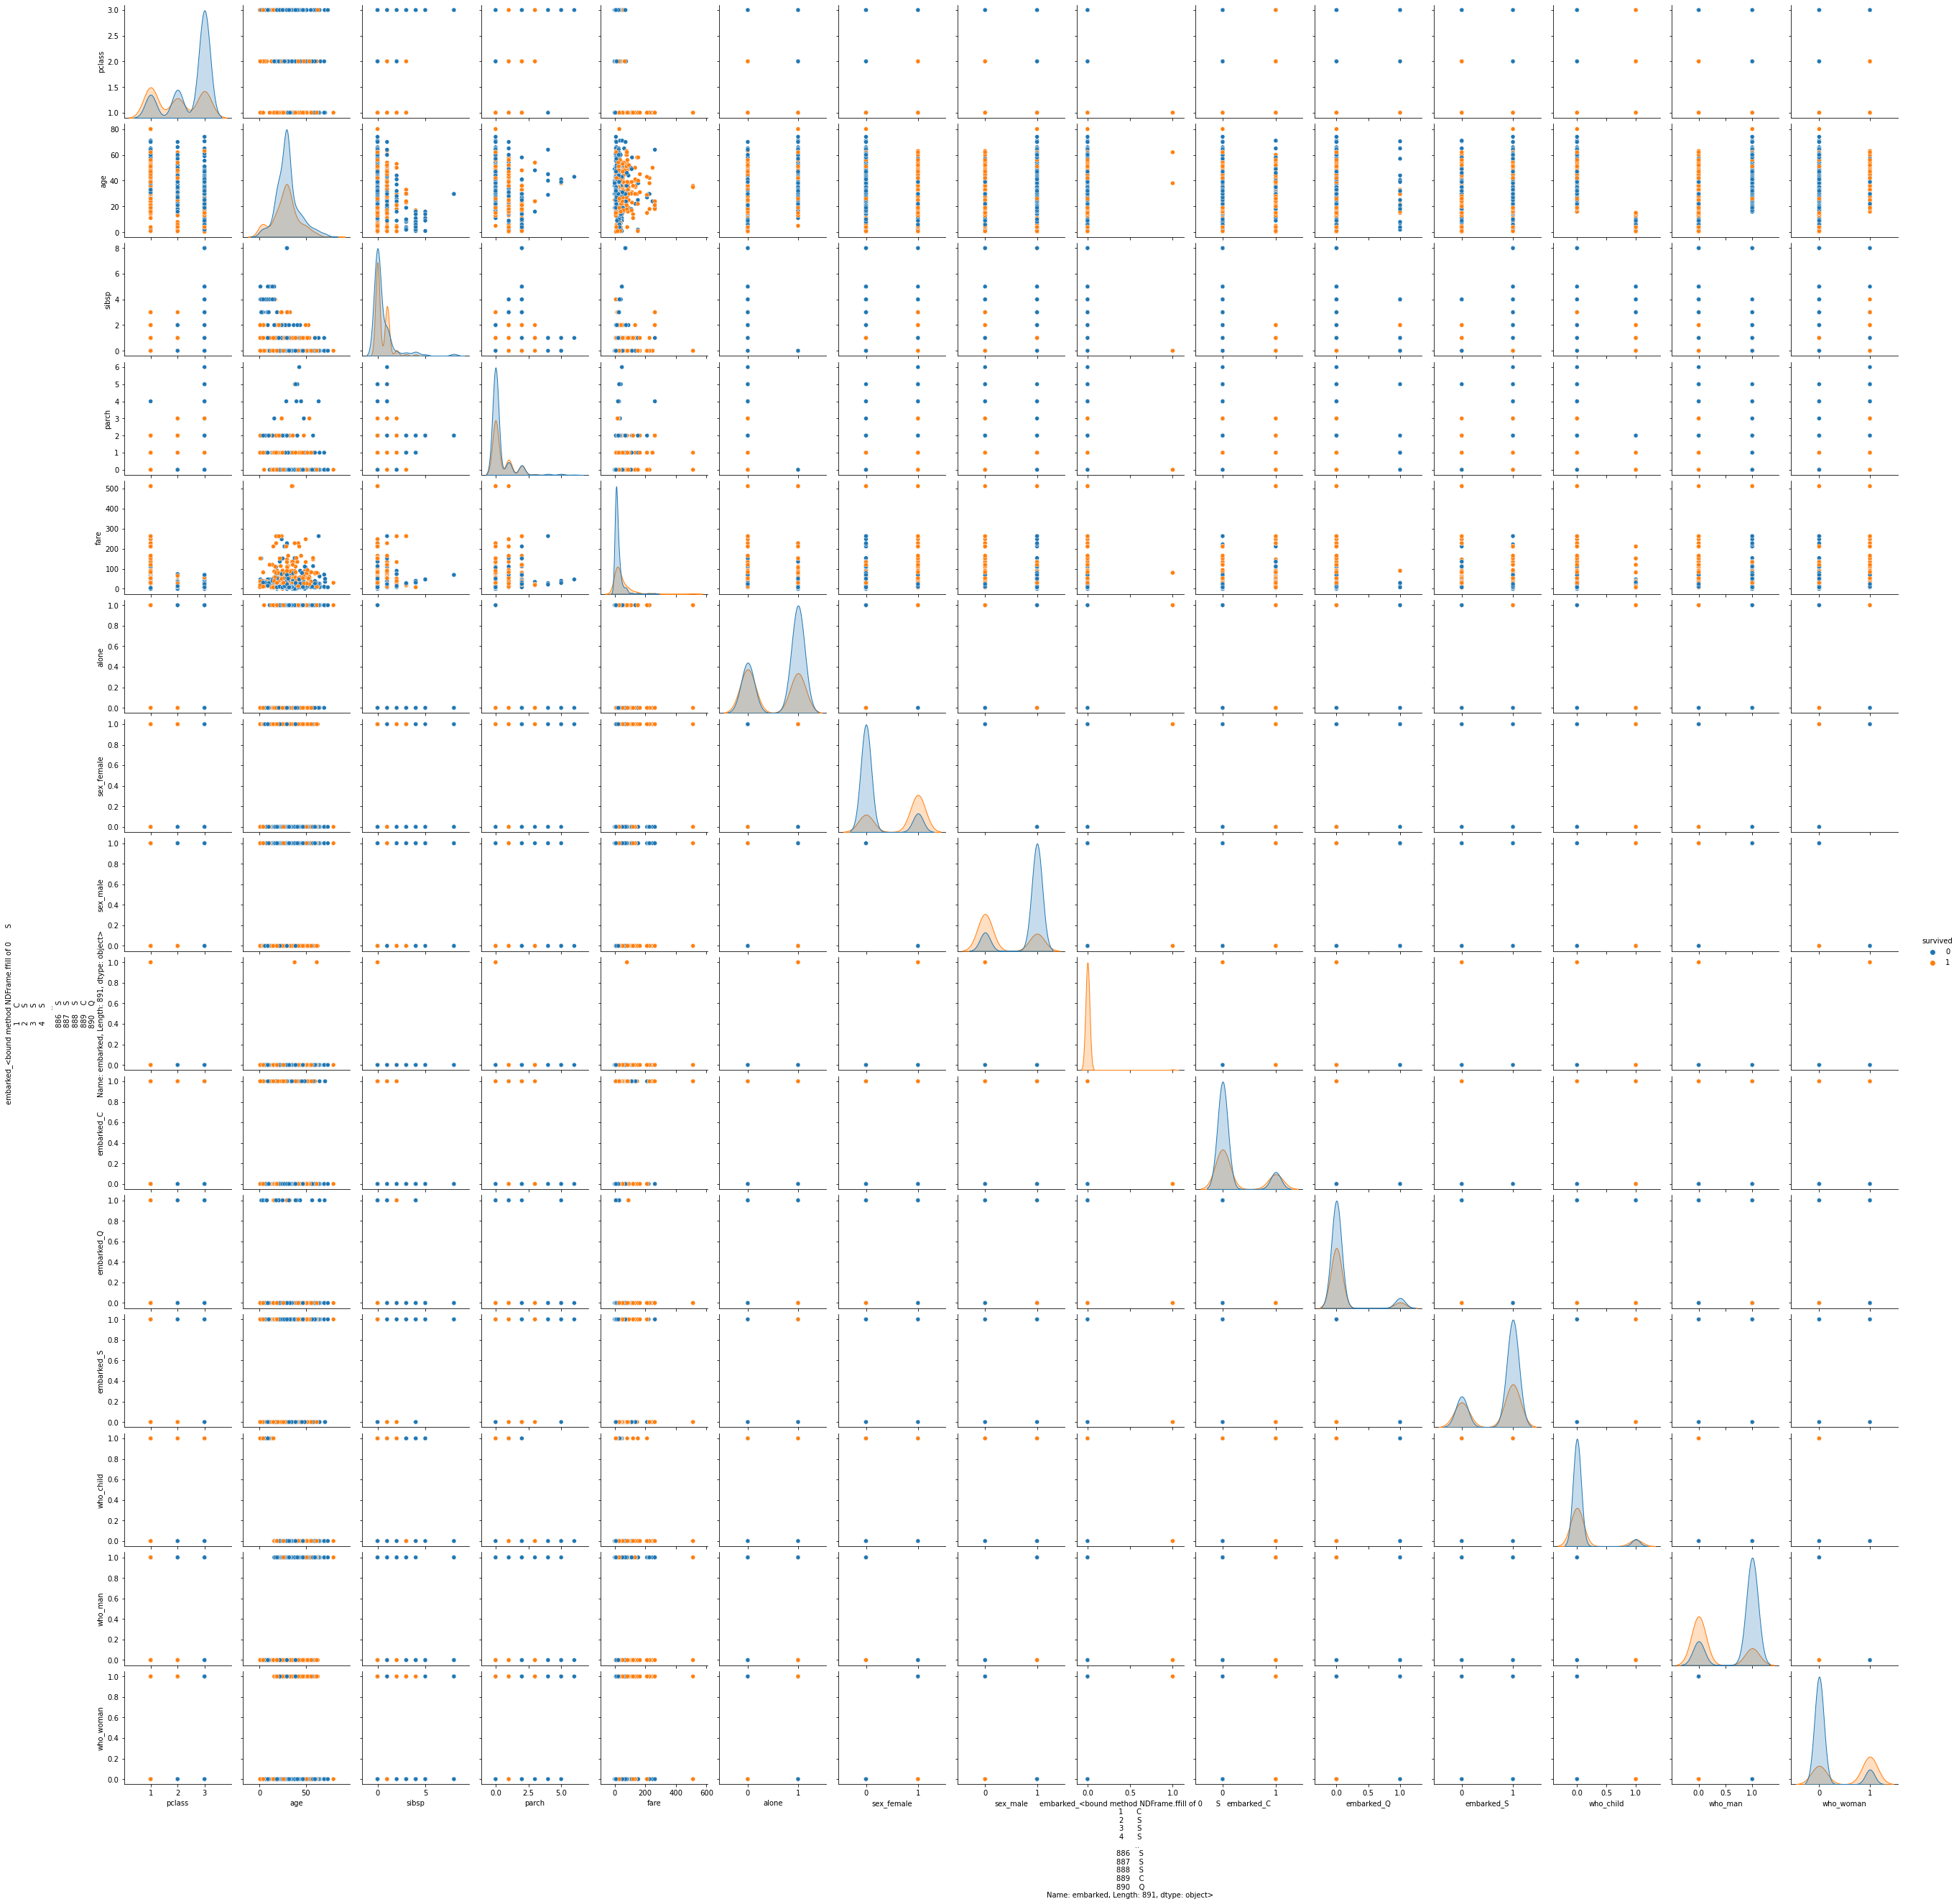

In [11]:
sns.pairplot(dataset,hue="survived")

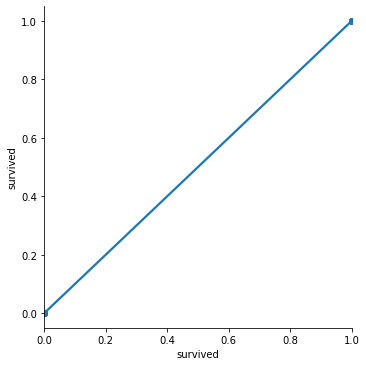

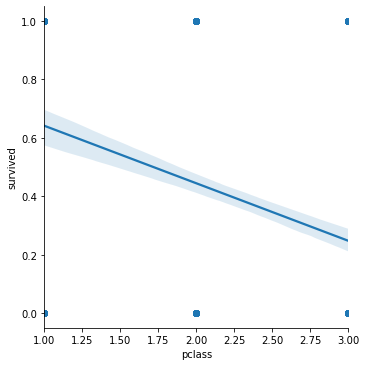

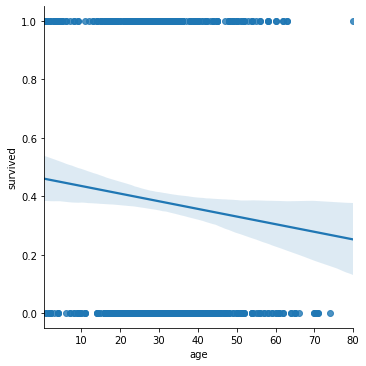

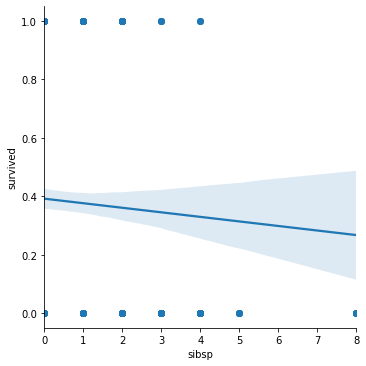

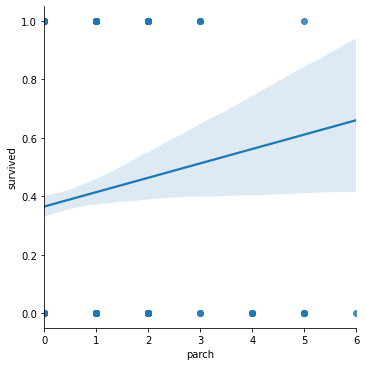

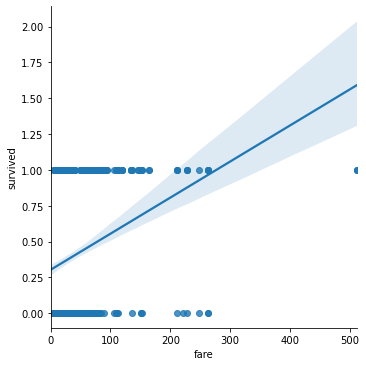

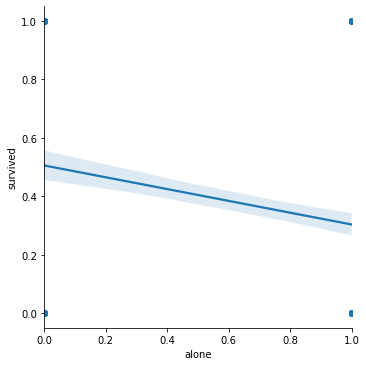

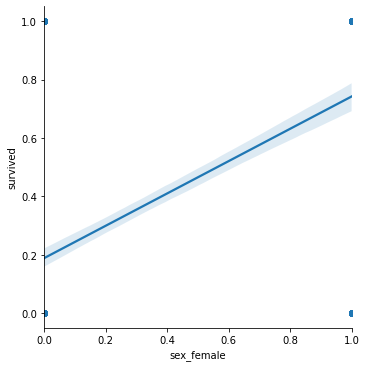

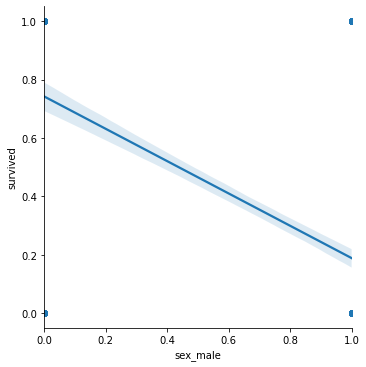

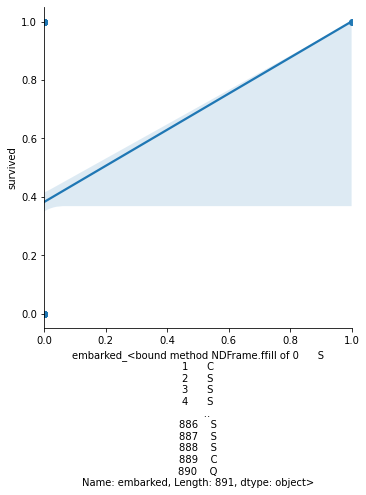

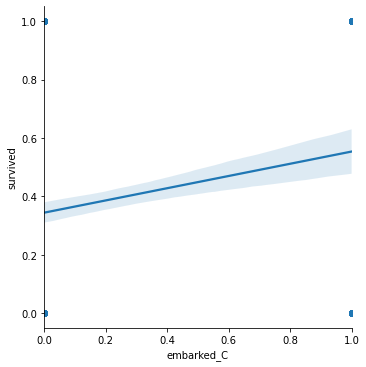

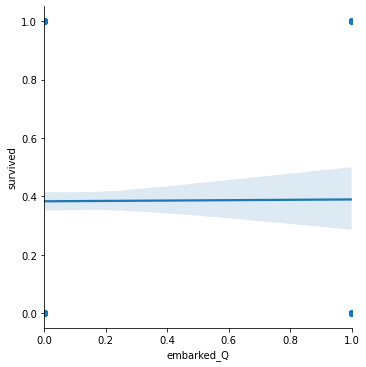

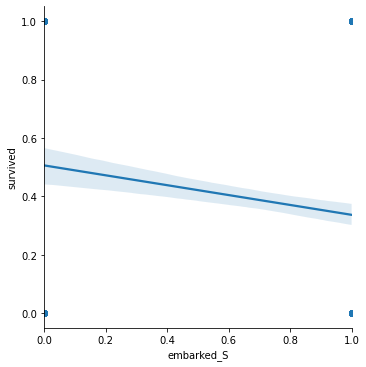

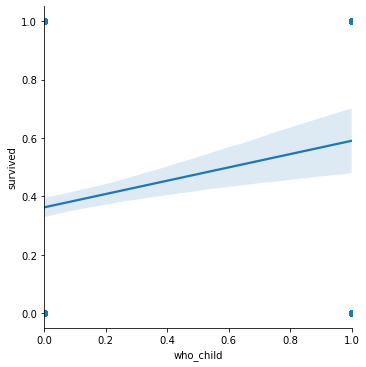

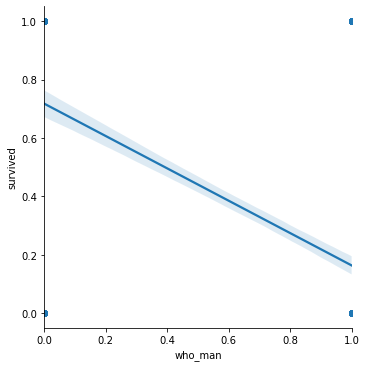

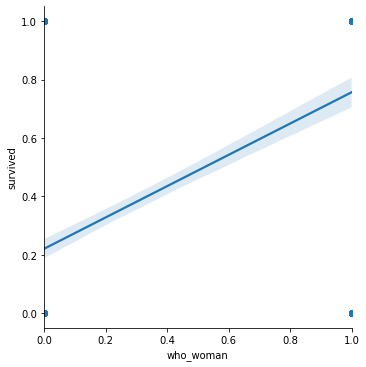

In [12]:
for i in dataset:
    sns.lmplot(x=i,y="survived",data=dataset)
    plt.show()

In [13]:
x = dataset.drop("survived",axis=1)
y = dataset['survived']

## Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

## Training the Logistic Regression model on the Training set

In [15]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)

C:\Users\91852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Score on Training data

In [16]:
reg.score(x_train,y_train)

0.824438202247191

## Model Score on Testing data

In [17]:
reg.score(x_test,y_test)

0.8324022346368715

## Predicting the Test set Results

In [18]:
y_pred = reg.predict(x_test)

## Cinfusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[91,  8],
       [22, 58]], dtype=int64)

## Classification Report

In [20]:
from sklearn.metrics import accuracy_score,r2_score,f1_score,precision_score,recall_score
print("Accuracy Score =" ,accuracy_score(y_pred,y_test))
print("R2 Score =", r2_score(y_pred,y_test))
print("Recall Score =",recall_score(y_pred,y_test))
print("Precision Score =",precision_score(y_pred,y_test))
print("f1 Score =", f1_score(y_pred,y_test))

Accuracy Score = 0.8324022346368715
R2 Score = 0.27996781979082874
Recall Score = 0.8787878787878788
Precision Score = 0.725
f1 Score = 0.7945205479452054
